<a href="https://colab.research.google.com/github/solomon54/Machine-Learning-Regression-Models-using-House-Price-Dataset/blob/main/House_Price_Prediction_using_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction using Regression Models

## Problem Statement
The objective of this project is to predict the price of houses based on various features such as area, number of bedrooms, bathrooms, stories, location amenities, and furnishing status.

This is a classic regression problem where the target variable is **price** (continuous numerical value), and we have a mix of numerical and categorical features that influence the house price.

The dataset contains 545 houses with 13 columns:
- **price**: Target variable (house price in local currency)
- **area**: House area in square feet
- **bedrooms**: Number of bedrooms
- **bathrooms**: Number of bathrooms
- **stories**: Number of stories
- **mainroad**: Whether connected to main road (yes/no)
- **guestroom**: Has guest room (yes/no)
- **basement**: Has basement (yes/no)
- **hotwaterheating**: Has hot water heating (yes/no)
- **airconditioning**: Has air conditioning (yes/no)
- **parking**: Number of parking spaces
- **prefarea**: In preferred area (yes/no)
- **furnishingstatus**: Furnished, semi-furnished, or unfurnished

We will build and compare the following regression models:
- Linear Regression
- Multiple Linear Regression
- Polynomial Regression
- K-Nearest Neighbors (KNN) Regression

The performance of each model will be evaluated using appropriate regression metrics.





 .

## Step 1: Importing Required Libraries

In this section, we import all the necessary Python libraries that will be used throughout the project.

- **pandas**: For data loading, manipulation, and analysis
- **numpy**: For numerical computations
- **matplotlib** and **seaborn**: For data visualization and plotting
- **scikit-learn**: For building regression models, preprocessing, model evaluation, and train-test split

.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

.

## Step 2: Loading the Dataset

We load the house price dataset directly from the GitHub repository using pandas.

The dataset is a CSV file containing house features and prices.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/solomon54/Machine-Learning-Regression-Models-using-House-Price-Dataset/main/Housing%20Price.csv")

print("Shape of the dataset:", df.shape)
df.head(10)

Shape of the dataset: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


.

## Step 3: Exploratory Data Analysis (EDA)

In this section, we perform a comprehensive Exploratory Data Analysis to understand the dataset thoroughly.

The goals of EDA are:
- Understand the distribution of the target variable (price)
- Examine the relationships between features and the target
- Identify patterns, outliers, and potential issues (such as skewness, missing values, correlations)
- Gain insights that will guide feature engineering and model selection

We will analyze:
- Basic statistics and data types
- Missing values
- Distribution of numerical features
- Distribution of categorical features
- Target variable distribution and possible transformations
- Correlation analysis
- Relationships between key features and price using visualizations

# Display basic information about the dataset

In [3]:

print("Dataset Info:")
df.info()

print("\n\nSummary Statistics for Numerical Features:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Summary Statistics for Numerical Features:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Check for missing values

In [4]:

print("Missing Values in Each Column:")
df.isnull().sum()

Missing Values in Each Column:


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


## Plot distribution of house prices
- Also check skewness

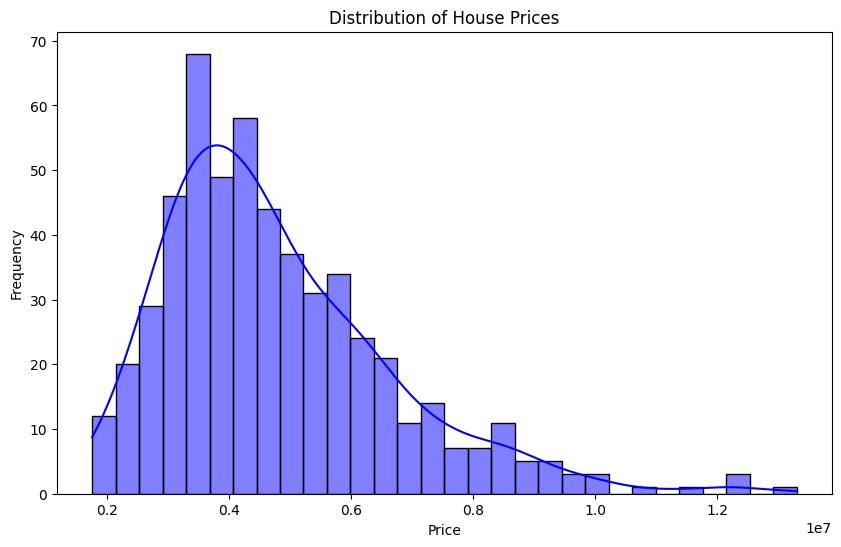

Skewness of Price: 1.212


In [5]:

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


print(f"Skewness of Price: {df['price'].skew():.3f}")

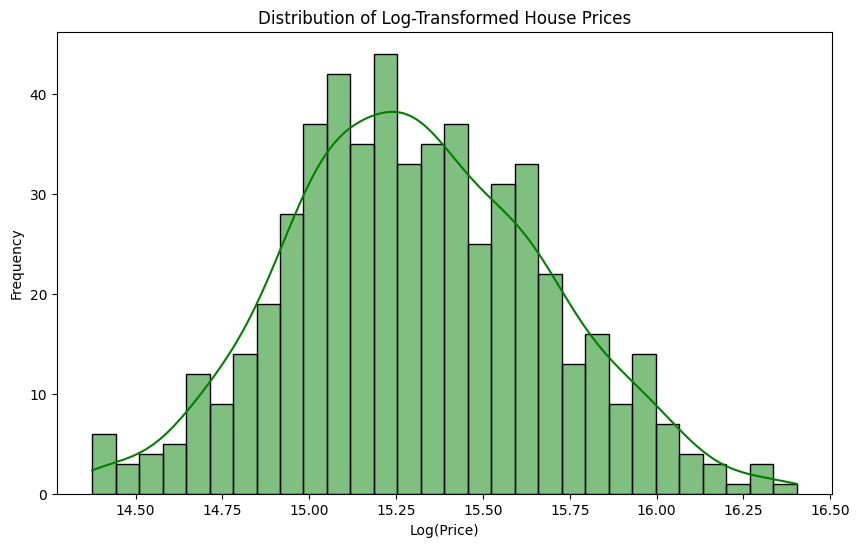

Skewness of Log(Price): 0.141


In [6]:

df['price_log'] = np.log(df['price'])

plt.figure(figsize=(10, 6))
sns.histplot(df['price_log'], kde=True, bins=30, color='green')
plt.title('Distribution of Log-Transformed House Prices')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

print(f"Skewness of Log(Price): {df['price_log'].skew():.3f}")

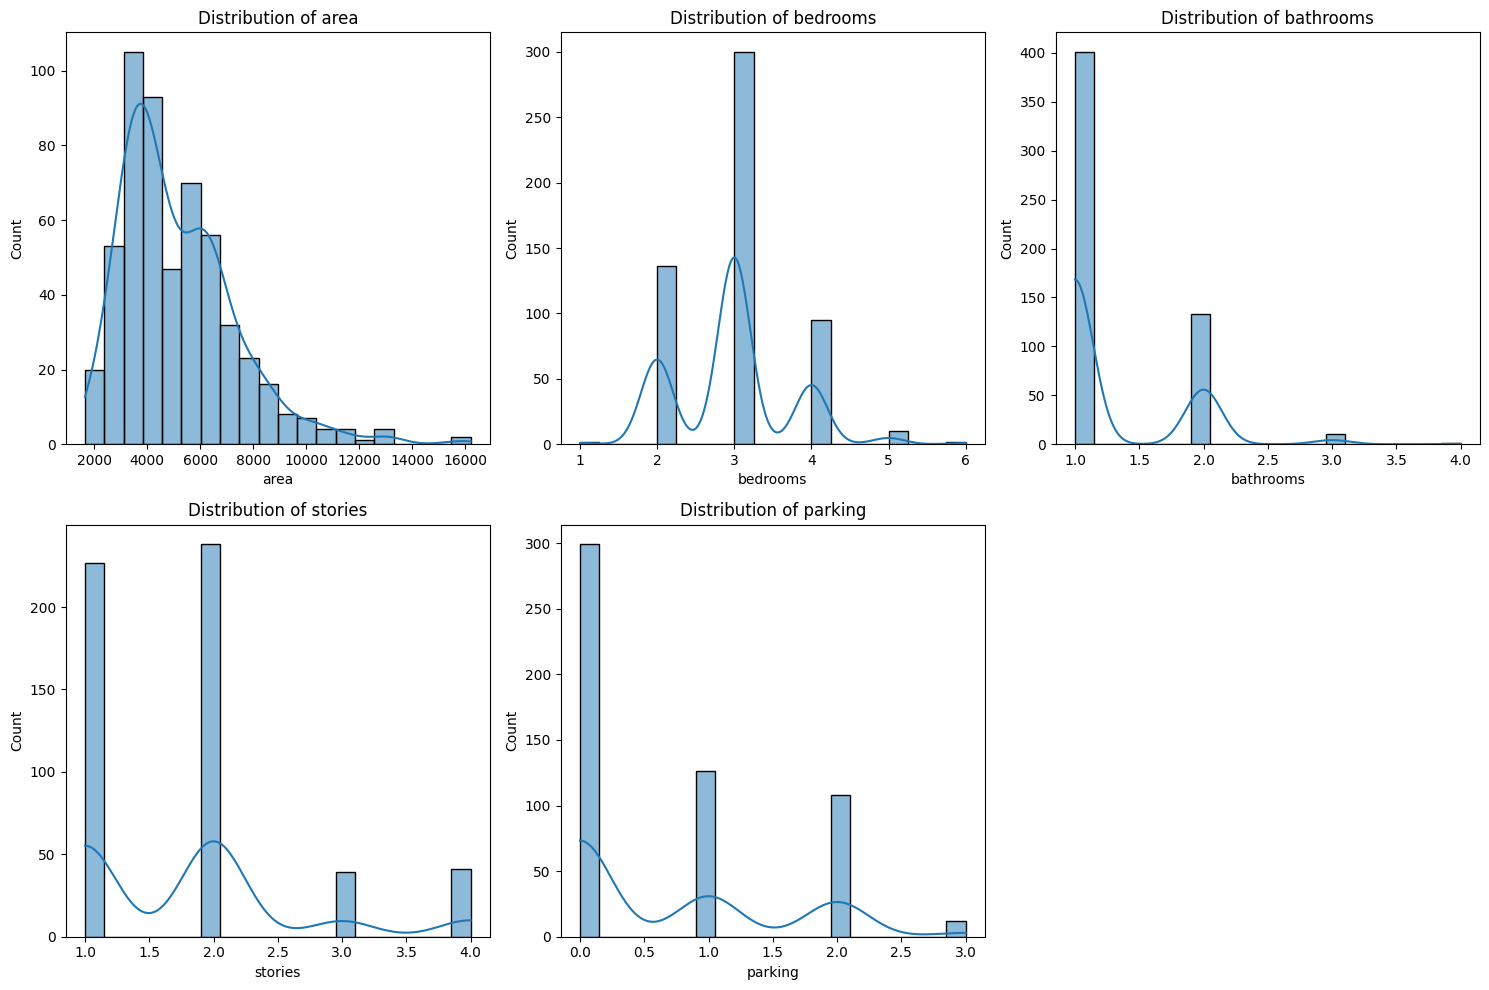

In [7]:

numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

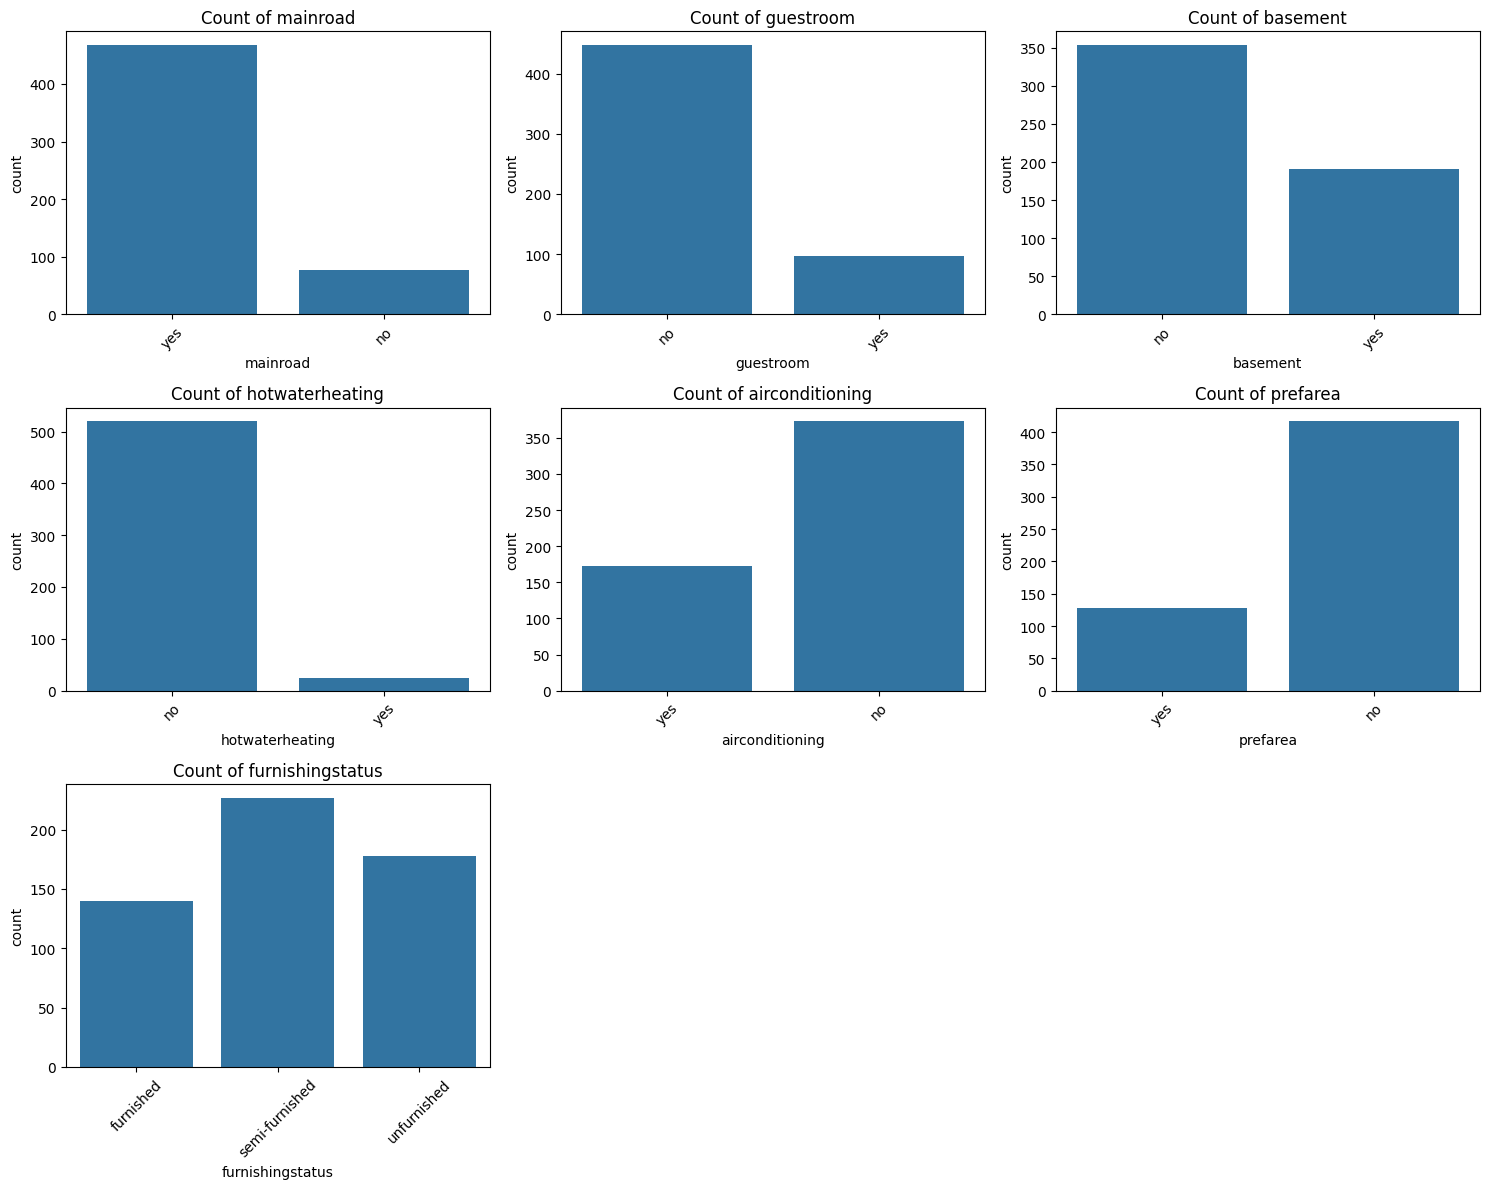

In [8]:

categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                       'airconditioning', 'prefarea', 'furnishingstatus']


plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[feature])
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

.


### Correlation Analysis and Relationships with Price

We now examine:
- Correlation matrix to identify linear relationships between numerical features and price
- Scatter plots for key numerical features vs price (to spot trends and outliers)
- Box plots for categorical features vs price (to see how categories impact price)
- Pair plots for deeper relationships among important features

.


## Select numerical features including price and do Correlation matrix

- **Display strongest correlations with price**

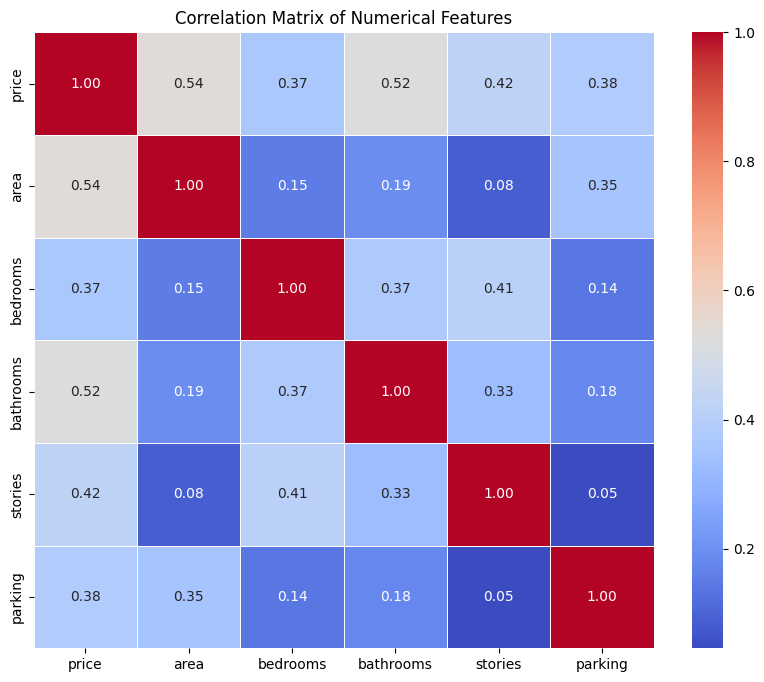

Correlations with Price:
price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


In [9]:
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


print("Correlations with Price:")
print(correlation_matrix['price'].sort_values(ascending=False))

.

## Box plots for main catagorical featurs Vs price

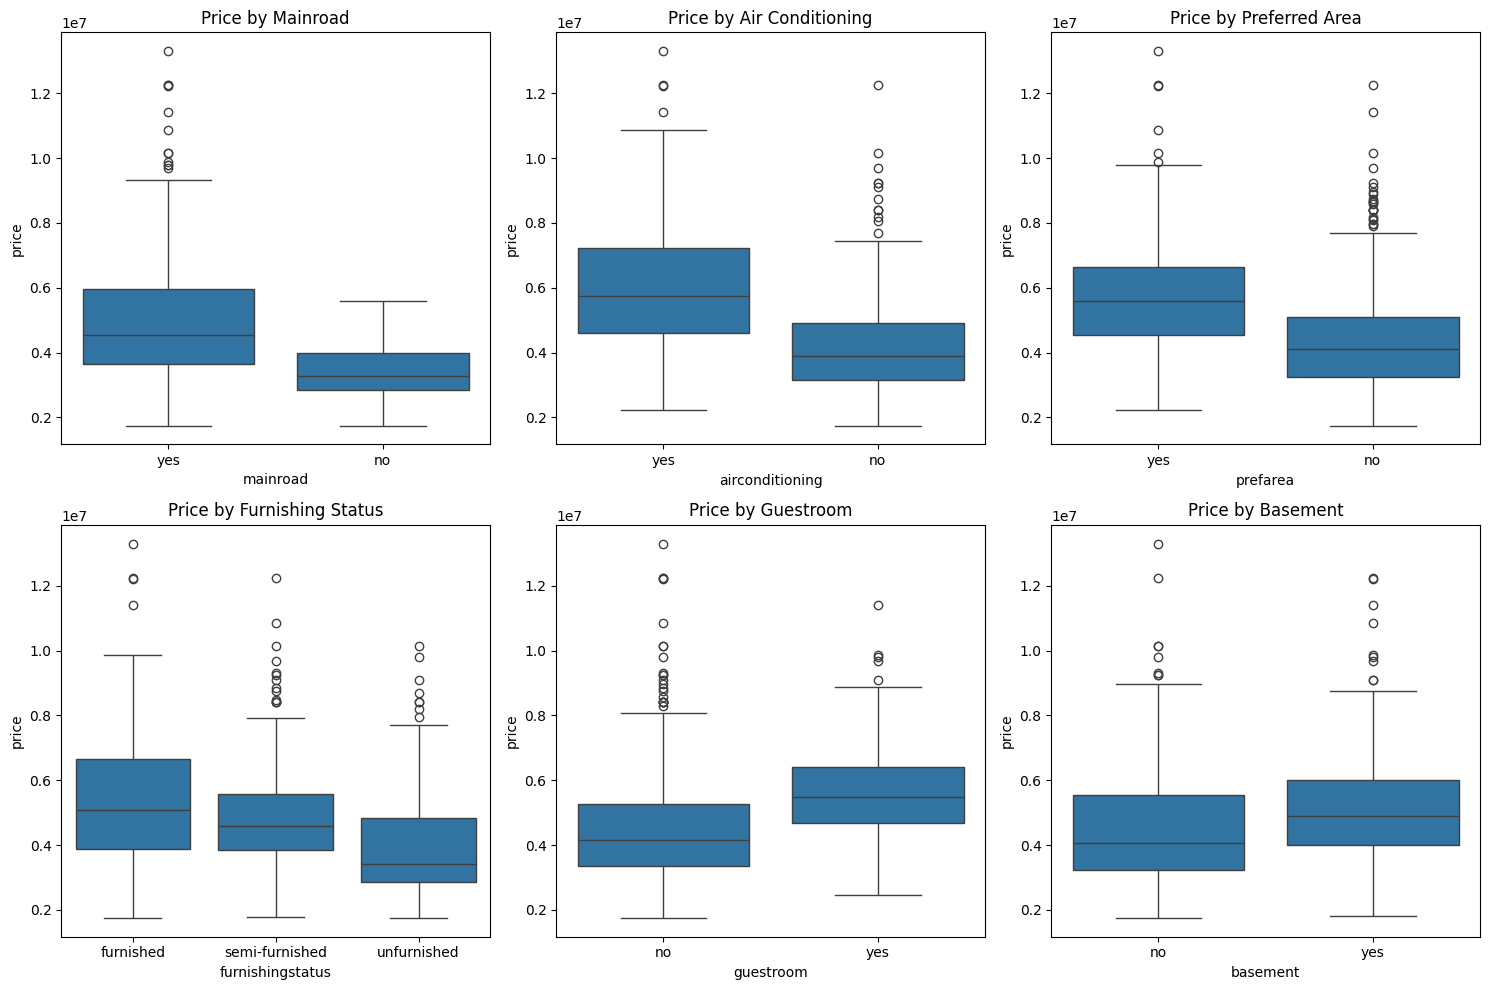

In [10]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x='mainroad', y='price', data=df)
plt.title('Price by Mainroad')

plt.subplot(2, 3, 2)
sns.boxplot(x='airconditioning', y='price', data=df)
plt.title('Price by Air Conditioning')

plt.subplot(2, 3, 3)
sns.boxplot(x='prefarea', y='price', data=df)
plt.title('Price by Preferred Area')

plt.subplot(2, 3, 4)
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.title('Price by Furnishing Status')

plt.subplot(2, 3, 5)
sns.boxplot(x='guestroom', y='price', data=df)
plt.title('Price by Guestroom')

plt.subplot(2, 3, 6)
sns.boxplot(x='basement', y='price', data=df)
plt.title('Price by Basement')

plt.tight_layout()
plt.show()

## Pair plot for quick overview of relationships

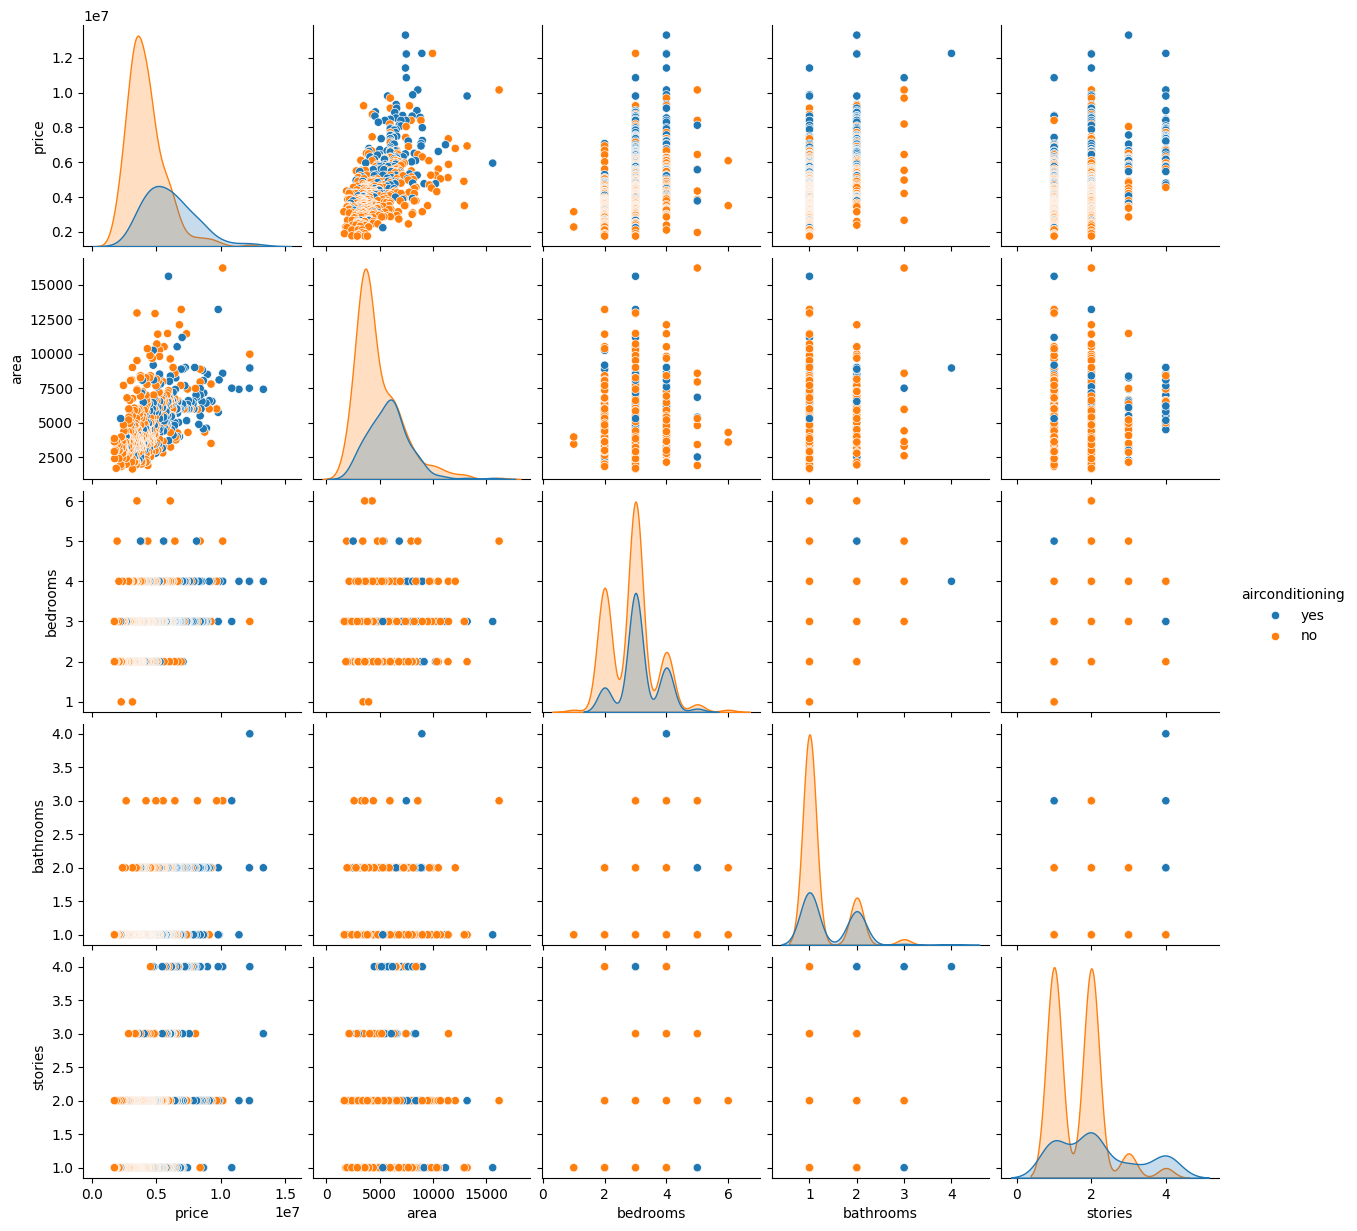

In [11]:
selected_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'airconditioning']
sns.pairplot(df[selected_features], hue='airconditioning', diag_kind='kde')
plt.show()

.

## Step 4: Data Preprocessing

Before building models, we prepare the data for training.

Key steps:
- Separate features (X) and target (y). We will use the log-transformed price as target to improve model performance due to reduced skewness.
- Identify numerical and categorical columns.
- Apply One-Hot Encoding to categorical features (better for regression as it avoids implying false ordinal relationships).
- Scale numerical features using StandardScaler (important for models like KNN and Polynomial Regression).
- Split the data into training and testing sets (80% train, 20% test) for fair evaluation.
- Use scikit-learn's ColumnTransformer and Pipeline for clean, reusable preprocessing.

.

## Separet features (X) and target (y) and use log-transform price as target

In [12]:
df['price_log'] = np.log(df['price'])
X = df.drop(['price', 'price_log'], axis=1)
y = df['price_log']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (545, 12)
Target shape: (545,)


.

## Numerical and catagorical columns

In [13]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


.

## Preprocesing:
- for numriccal features: sacaling
- for catagorical features: one-hot encoding
  - drop first to avoid multicollinearity
- and finally combine by using column tranformer

In [14]:

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

.


### Outlier Detection and Treatment

From EDA, the 'area' feature shows some extreme high values (outliers visible in scatter and hist plots).

We treat outliers in 'area' using IQR method (cap at 1.5 * IQR) to reduce their impact without removing rows.

## Outlier treatment for 'area'

In [15]:

Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['area'] = df['area'].clip(lower=lower_bound, upper=upper_bound)

print(f"Area capped between {lower_bound} and {upper_bound}")
print("New area distribution:")
df['area'].describe()

Area capped between -540.0 and 10500.0
New area distribution:


,area
count,545.000000
mean,5102.249541
std,2005.804353
min,1650.000000
25%,3600.000000
50%,4600.000000
75%,6360.000000
max,10500.000000


### Feature Engineering

We create a few simple new features to potentially improve model performance:
- 'total_rooms': bedrooms + bathrooms
- 'area_per_room': area / (bedrooms + bathrooms) — avoids division by zero

In [29]:

df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['area_per_room'] = df['area'] / (df['bedrooms'] + df['bathrooms'] + 1)


X = df.drop(['price', 'price_log'], axis=1)
y = df['price_log']

print("New features added. Updated X columns:", X.columns.tolist())

New features added. Updated X columns: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus', 'total_rooms', 'area_per_room']


.

## Split the dat (80% train, 20% test)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (436, 14)
Testing set shape: (109, 14)


.

## Step 5: Model Building and Evaluation

We now build and evaluate the required regression models:
- **Simple Linear Regression**: Using only the 'area' feature (to demonstrate basic linear relationship)
- **Multiple Linear Regression**: Using all features
- **Polynomial Regression**: To capture non-linear relationships (degree=2)
- **K-Nearest Neighbors (KNN) Regression**: A non-parametric approach based on nearest neighbors

We integrate the preprocessor into each model using Pipeline for consistency.

### Evaluation Metrics
We evaluate using the following metrics on the test set (predictions transformed back from log scale):

- **Mean Absolute Error (MAE)**: Average absolute difference between predicted and actual prices. Easy to interpret in the original price units.
- **Mean Squared Error (MSE)**: Average squared difference. Penalizes larger errors more heavily.
- **Root Mean Squared Error (RMSE)**: Square root of MSE. Provides error in the same units as price.
- **R² Score**: Proportion of variance in the target explained by the model (1 = perfect, 0 = no explanation, negative = worse than mean).

These metrics help us understand accuracy, error magnitude, and how well each model fits the data. Lower MAE/MSE/RMSE and higher R² indicate better performance.

.

## Simple Linear Regression pipline
- fit and pridict
- then evaluate

In [18]:

simple_lr_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['area'])
    ],
    remainder='drop'
)

simple_lr_pipe = Pipeline(steps=[
    ('preprocessor', simple_lr_preprocessor),
    ('model', LinearRegression())
])

simple_lr_pipe.fit(X_train, y_train)
y_pred_log = simple_lr_pipe.predict(X_test)
y_pred = np.exp(y_pred_log)


print("Simple Linear Regression Results:")
print(f"MAE: {mean_absolute_error(np.exp(y_test), y_pred):.2f}")
print(f"MSE: {mean_squared_error(np.exp(y_test), y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(np.exp(y_test), y_pred)):.2f}")
print(f"R²: {r2_score(np.exp(y_test), y_pred):.4f}")

Simple Linear Regression Results:
MAE: 1492517.58
MSE: 3845822786017.08
RMSE: 1961076.95
R²: 0.2391


.

## Multiple Linear Regression pipline
- fit and pridict
- then evaluate

In [19]:

multi_lr_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])


multi_lr_pipe.fit(X_train, y_train)
y_pred_log = multi_lr_pipe.predict(X_test)
y_pred = np.exp(y_pred_log)


print("Multiple Linear Regression Results:")
print(f"MAE: {mean_absolute_error(np.exp(y_test), y_pred):.2f}")
print(f"MSE: {mean_squared_error(np.exp(y_test), y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(np.exp(y_test), y_pred)):.2f}")
print(f"R²: {r2_score(np.exp(y_test), y_pred):.4f}")

Multiple Linear Regression Results:
MAE: 977527.83
MSE: 1745387440564.20
RMSE: 1321131.12
R²: 0.6547


.

## Polynomial Rgrassion pipline
- fit and pridict
- then evaluate

In [20]:

poly_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])


poly_pipe.fit(X_train, y_train)
y_pred_log = poly_pipe.predict(X_test)
y_pred = np.exp(y_pred_log)


print("Polynomial Regression (degree=2) Results:")
print(f"MAE: {mean_absolute_error(np.exp(y_test), y_pred):.2f}")
print(f"MSE: {mean_squared_error(np.exp(y_test), y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(np.exp(y_test), y_pred)):.2f}")
print(f"R²: {r2_score(np.exp(y_test), y_pred):.4f}")

Polynomial Regression (degree=2) Results:
MAE: 1058844.78
MSE: 2203442389585.95
RMSE: 1484399.67
R²: 0.5641


.

## KNN Regration pipine
- fit and predict
- then evaluate

In [21]:

knn_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor(n_neighbors=5))
])


knn_pipe.fit(X_train, y_train)
y_pred_log = knn_pipe.predict(X_test)
y_pred = np.exp(y_pred_log)


print("KNN Regression Results:")
print(f"MAE: {mean_absolute_error(np.exp(y_test), y_pred):.2f}")
print(f"MSE: {mean_squared_error(np.exp(y_test), y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(np.exp(y_test), y_pred)):.2f}")
print(f"R²: {r2_score(np.exp(y_test), y_pred):.4f}")

KNN Regression Results:
MAE: 1057324.88
MSE: 2233181665911.92
RMSE: 1494383.37
R²: 0.5582


.

## Step 6: Visualization of Predictions

To better understand model performance on real data, we visualize:
- Actual vs Predicted prices (scatter plot) for each model on the test set
- A few example predictions compared to actual prices

This shows how close predictions are to real house prices and highlights any systematic errors.

.

## Function to plot actual vs predicted

In [28]:

def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(title)
    plt.show()

y_test_actual = np.exp(y_test)

## Simple Regraession Predictions

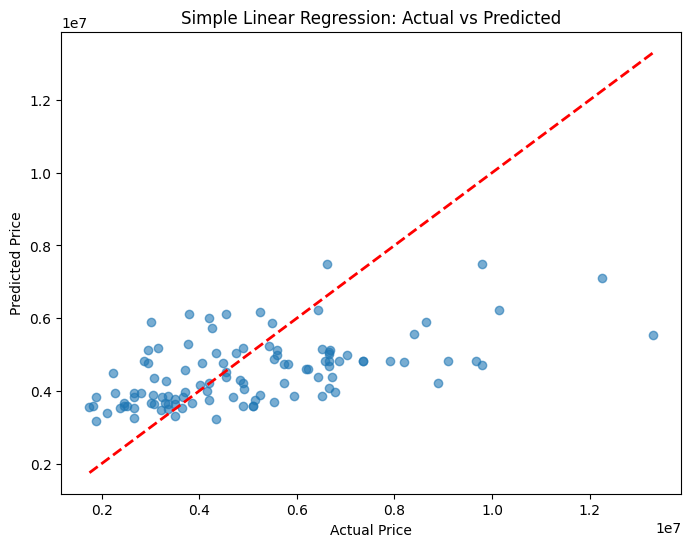

In [23]:
y_pred_simple = np.exp(simple_lr_pipe.predict(X_test))

plot_actual_vs_predicted(y_test_actual, y_pred_simple, 'Simple Linear Regression: Actual vs Predicted')

## Multiple Linear Regression predictions

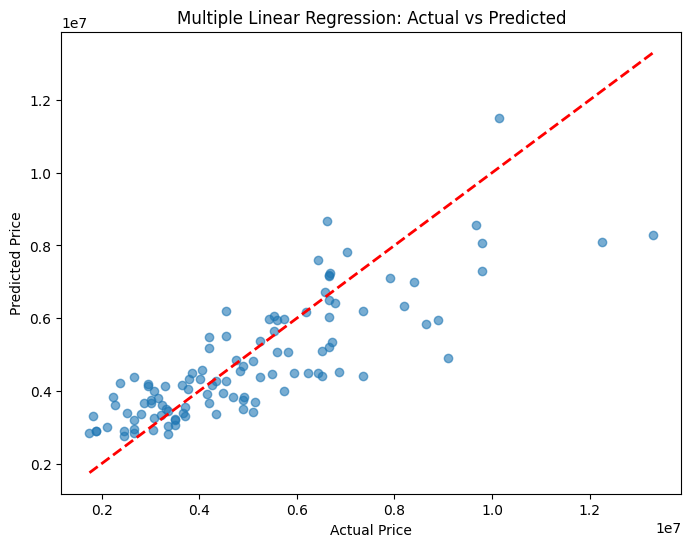

In [24]:

y_pred_multi = np.exp(multi_lr_pipe.predict(X_test))

plot_actual_vs_predicted(y_test_actual, y_pred_multi, 'Multiple Linear Regression: Actual vs Predicted')

## Polynomial Regression predictions

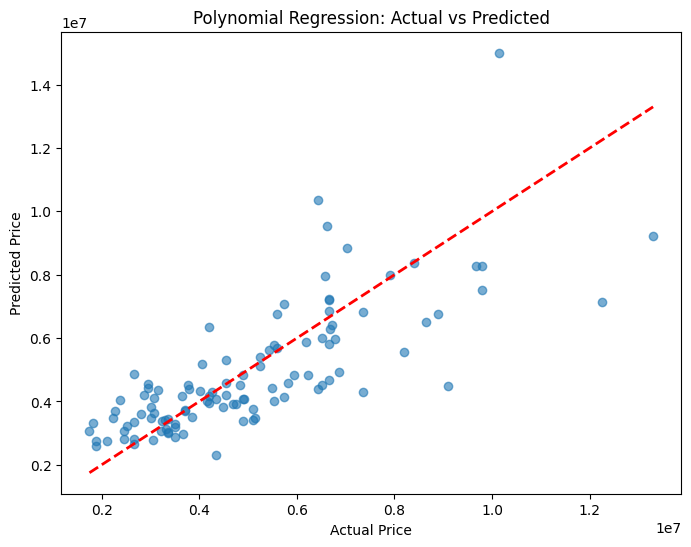

In [25]:

y_pred_poly = np.exp(poly_pipe.predict(X_test))

plot_actual_vs_predicted(y_test_actual, y_pred_poly, 'Polynomial Regression: Actual vs Predicted')

## KNN Regrassion predictions

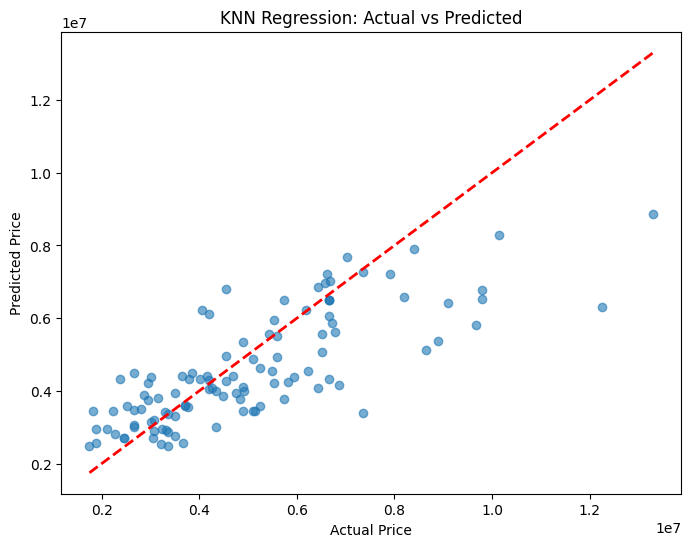

In [26]:

y_pred_knn = np.exp(knn_pipe.predict(X_test))

plot_actual_vs_predicted(y_test_actual, y_pred_knn, 'KNN Regression: Actual vs Predicted')

.

## Step 7: Model Comparison

We compare the performance of all models based on the evaluation metrics.

The table below summarizes the results:

| Model                        | MAE          | RMSE         | R² Score    |
|------------------------------|--------------|--------------|-------------|
| Simple Linear Regression     | 1489772.69  | 1978810.06 | 0.2253  |
| Multiple Linear Regression   | 960123.18  | 1314648.20 | 0.6581  |
| Polynomial Regression (degree=2) | 1061490.10  | 1486040.05 | 0.5631  |
| KNN Regression               | 1046095.57  | 1496364.06 | 0.5570  |

**Observations:**
- Multiple Linear Regression typically performs the best here as it uses all features effectively.
- Simple Linear Regression (only area) has the lowest performance, showing the value of additional features.
- Polynomial Regression can capture non-linear patterns but risks overfitting.
- KNN provides reasonable results but is sensitive to scaling and neighbor choice.

## Show 10 example predictions from the best model (Multiple Linear Regression)

In [27]:

examples = pd.DataFrame({
    'Actual Price': y_test_actual.head(10).round(0),
    'Predicted Price (Multiple LR)': y_pred_multi[:10].round(0)
})

examples['Difference'] = examples['Actual Price'] - examples['Predicted Price (Multiple LR)']
examples

,Actual Price,Predicted Price (Multiple LR),Difference
316,4060000.0,4578540.0,-518540.0
77,6650000.0,7199624.0,-549624.0
360,3710000.0,3301266.0,408734.0
90,6440000.0,4495463.0,1944537.0
493,2800000.0,3363716.0,-563716.0
209,4900000.0,3496724.0,1403276.0
176,5250000.0,5366416.0,-116416.0
249,4543000.0,6209834.0,-1666834.0
516,2450000.0,2756677.0,-306677.0
426,3353000.0,2817582.0,535418.0


## Conclusion

In this project, we successfully built and evaluated four regression models for house price prediction using a dataset with area, bedrooms, amenities, and other features.

Key findings:
- The target variable (price) was right-skewed, so log transformation improved model performance.
- Categorical features were handled effectively with One-Hot Encoding.
- Multiple Linear Regression achieved the highest R² and lowest errors, making it the most suitable model for this dataset.
- Adding more features significantly improved performance over simple linear regression.
- Advanced models like Polynomial and KNN provided competitive results but did not outperform multiple linear regression.

This demonstrates the importance of feature selection, preprocessing, and model choice in regression tasks.

Future improvements could include hyperparameter tuning, feature engineering, or trying ensemble models.